# Evaluación del PM 2.5 en California: Comparativa de Calidad del Aire entre 2022 y 2023

**Regresión lineal**

# Importando librerias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

csv_2022 = 'https://github.com/MayerlyO/PROYECTOS-PARA-INGENIERIA-I/blob/main/Entregables/Entregable%201%20/Base%20de%20Datos/ad_viz_plotval_data%20(2)%20(1).csv'
csv_2023 = 'https://github.com/MayerlyO/PROYECTOS-PARA-INGENIERIA-I/blob/main/Entregables/Entregable%201%20/Base%20de%20Datos/ad_viz_plotval_data%20(3)%20(1).csv'

df = pd.read_csv(csv_2022)
df2 = pd.read_csv(csv_2023)
df = df[['Date', 'Daily Mean PM2.5 Concentration', 'Daily AQI Value']]
df2 = df2[['Date', 'Daily Mean PM2.5 Concentration', 'Daily AQI Value']]

df['Date'] = pd.to_datetime(df['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Archivo mediciones de PM2.5 2022

In [ ]:
pd.read_csv(csv_2022).head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2022,AQS,60010007,3,12.7,ug/m3 LC,58,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2022,AQS,60010007,3,13.9,ug/m3 LC,60,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2022,AQS,60010007,3,7.1,ug/m3 LC,39,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2022,AQS,60010007,3,3.7,ug/m3 LC,21,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2022,AQS,60010007,3,4.2,ug/m3 LC,23,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


# Archivo mediciones de PM2.5 2022

In [ ]:
pd.read_csv(csv_2023).head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2023,AQS,60010007,3,3.7,ug/m3 LC,21,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2023,AQS,60010007,3,2.7,ug/m3 LC,15,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2023,AQS,60010007,3,3.6,ug/m3 LC,20,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2023,AQS,60010007,3,2.7,ug/m3 LC,15,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2023,AQS,60010007,3,4.7,ug/m3 LC,26,Livermore,1,100.0,...,170.0,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


# Dataframe 2022 con las columnas a utilizar

In [ ]:
df.head()

,Date,Daily Mean PM2.5 Concentration,Daily AQI Value
0,2022-01-01,12.7,58
1,2022-01-02,13.9,60
2,2022-01-03,7.1,39
3,2022-01-04,3.7,21
4,2022-01-05,4.2,23


## Dataframe 2023 con las columnas a utilizar

In [ ]:
df2.head()

,Date,Daily Mean PM2.5 Concentration,Daily AQI Value
0,2023-01-01,3.7,21
1,2023-01-02,2.7,15
2,2023-01-03,3.6,20
3,2023-01-04,2.7,15
4,2023-01-05,4.7,26


# **Matriz de correlación y heatmap PM2.5 - 2022**

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Daily Mean PM2.5 Concentration,Daily AQI Value
Daily Mean PM2.5 Concentration,1.000000,0.911538
Daily AQI Value,0.911538,1.000000


<Axes: >

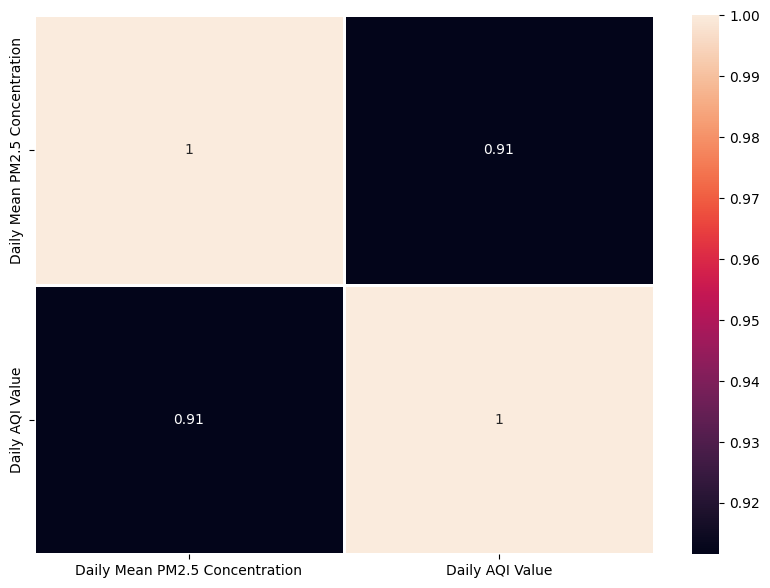

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(),annot=True,linewidths=2)

# **Matriz de correlación y heatmap PM2.5 - 2023**

In [ ]:
numeric_df2 = df2.select_dtypes(include=[np.number])
numeric_df2.corr()

,Daily Mean PM2.5 Concentration,Daily AQI Value
Daily Mean PM2.5 Concentration,1.000000,0.909578
Daily AQI Value,0.909578,1.000000


<Axes: >

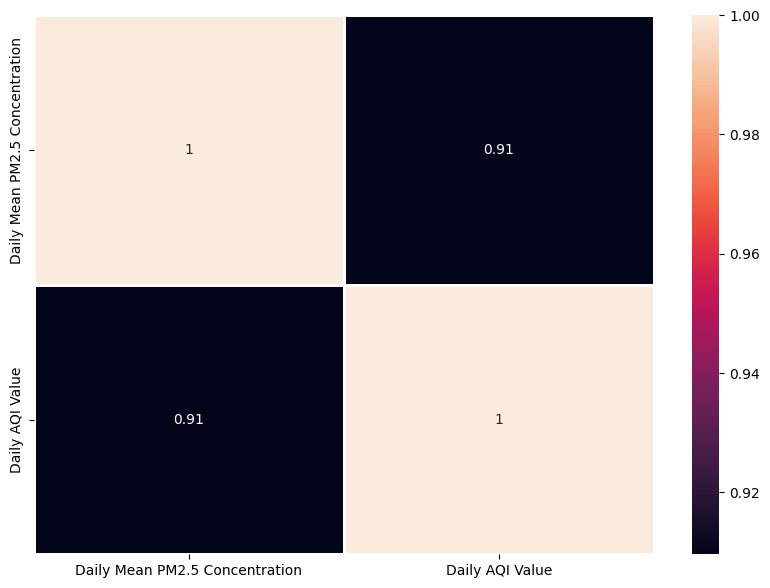

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(numeric_df2.corr(),annot=True,linewidths=2)

# Mediciones de Daily Mean PM2.5 Concentration 2022

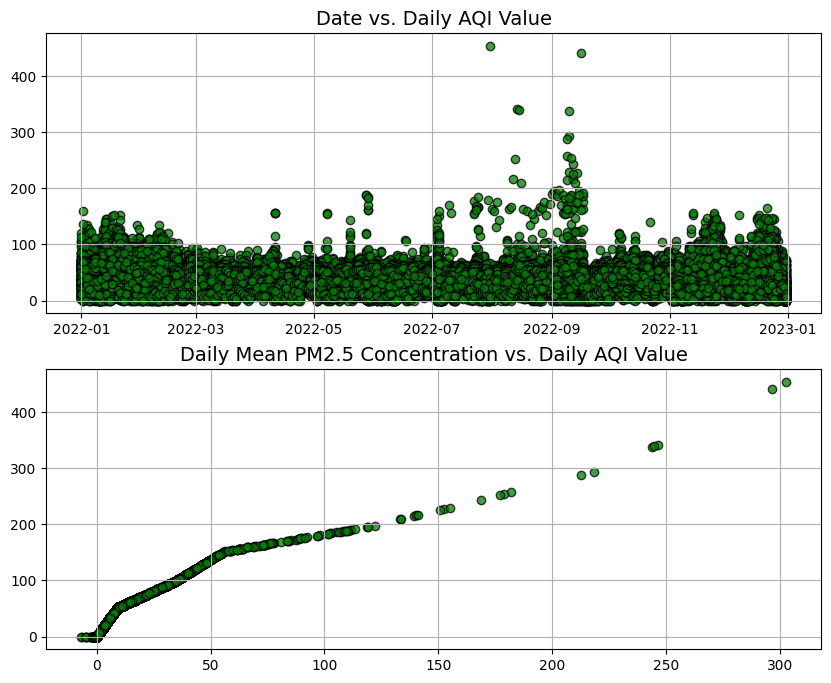

<Figure size 1200x600 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
ax = ax.ravel()
for i in range(2):
    ax[i].scatter(df[df.columns[i]],df['Daily AQI Value'],edgecolor='k',color='green',alpha=0.75)
    ax[i].set_title(f"{df.columns[i]} vs. Daily AQI Value",fontsize=14)
    ax[i].grid(True)
plt.figure(figsize=(12, 6))
plt.show()

# Entrenamiento de prueba PM2.5 2022

Valor del R cuadrado de este ajuste: 1.0
Mean square error (MSE): 0.19296509127789044


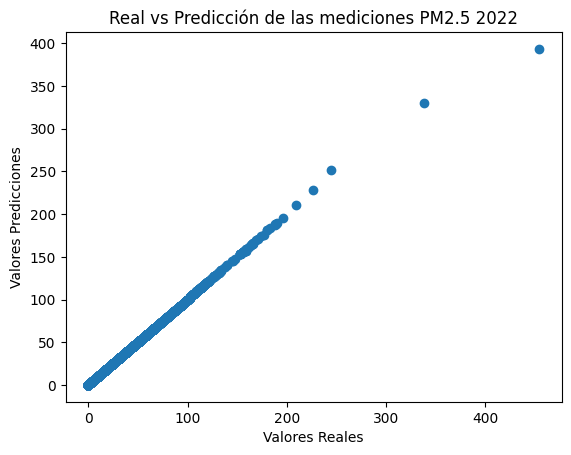

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X = df[['Daily Mean PM2.5 Concentration']]
y = df['Daily AQI Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

plt.scatter(x=y_test, y = test_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predicciones')
plt.title('Real vs Predicción de las mediciones PM2.5 2022')
print("Valor del R cuadrado de este ajuste:",round(r2_score(y_train,train_pred),3))
print("Mean square error (MSE):", mean_squared_error(y_test,test_pred))

Mediciones de Daily Mean PM2.5 Concentration 2023

# Dataframe 2022 y 2023 | Entrenamiento/Prediccion

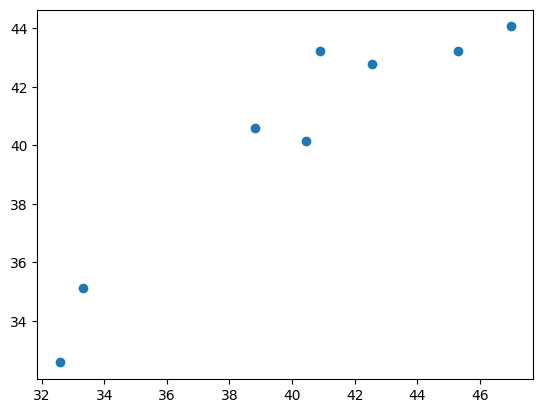

Error absoluto medio (MAE):  1.42
Error cuadrático medio (MSE):  3.09
Puntaje R²:  0.98
Precisión del modelo: 86.67%
Modelo guardado como aqi_model_linear.joblib


In [ ]:
# Agrupar por mes y calcular el promedio del AQI mensual para 2022 y 2023
df_mes_2022 = df.resample('M', on='Date').mean(numeric_only=True)
df_mes_2023 = df2.resample('M', on='Date').mean(numeric_only=True)

# Concatenar los datos de 2022 y 2023 para el entrenamiento
df_combined_2022_2023 = pd.concat([df_mes_2022, df_mes_2023])

X = df_combined_2022_2023[['Daily Mean PM2.5 Concentration']]
y = df_combined_2022_2023['Daily AQI Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)
plt.scatter(x=y_test, y = y_pred)
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_train, train_pred)

print(f"Error absoluto medio (MAE): {mae: .2f}")
print(f"Error cuadrático medio (MSE): {mse: .2f}")
print(f"Puntaje R²: {r2: .2f}")
accuracy = rf_model.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2%}")

model_filename = "aqi_model_linear.joblib"
joblib.dump(rf_model, model_filename)
print(f"Modelo guardado como {model_filename}")

nombre_archivo_modelo = "aqi_model_linear.joblib"
modelo = joblib.load(nombre_archivo_modelo)

# Grafica prediccion 2024

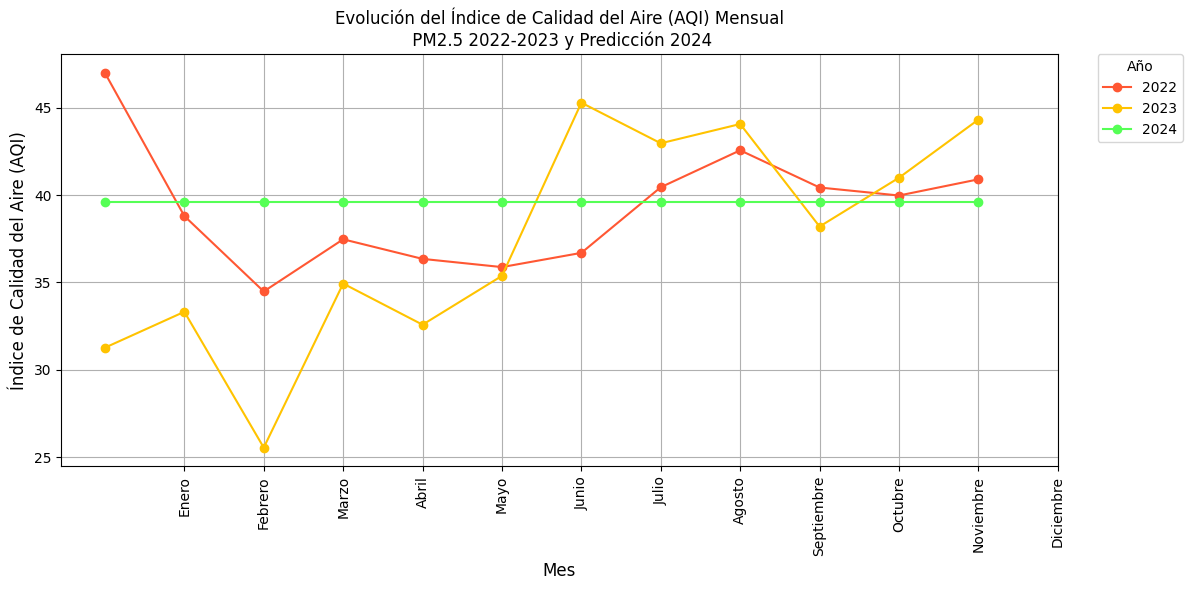

In [ ]:

meses_2024 = pd.date_range(start='2024-01-01', end='2024-12-31', freq='M')
X_2024 = np.tile(X.mean(axis=0), (12, 1))

predicciones_2024 = modelo.predict(X_2024)
df_pred_2024 = pd.DataFrame({'Month': meses_2024.strftime('%B'), 'AQI': predicciones_2024, 'Year': 2024})

df_real_2022 = df_mes_2022[['Daily AQI Value']].reset_index()
df_real_2022['Month'] = df_real_2022['Date'].dt.strftime('%B')
df_real_2022.columns = ['Date', 'AQI', 'Month']
df_real_2022['Year'] = 2022

df_real_2023 = df_mes_2023[['Daily AQI Value']].reset_index()
df_real_2023['Month'] = df_real_2023['Date'].dt.strftime('%B')
df_real_2023.columns = ['Date', 'AQI', 'Month']
df_real_2023['Year'] = 2023
df_combined = pd.concat([df_real_2022[['Month', 'AQI', 'Year']],
                         df_real_2023[['Month', 'AQI', 'Year']],
                         df_pred_2024])

plt.figure(figsize=(12, 6))

colors = ['#FF5733', '#FFC300', '#55FF55']
for i, year in enumerate(df_combined['Year'].unique()):
    data = df_combined[df_combined['Year'] == year]
    plt.plot(data['Month'], data['AQI'], marker='o', color=colors[i], label=year)

plt.title("Evolución del Índice de Calidad del Aire (AQI) Mensual\n PM2.5 2022-2023 y Predicción 2024", fontsize=12)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Índice de Calidad del Aire (AQI)", fontsize=12)
plt.xticks(rotation=90)

plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.subplots_adjust(top=0.2)
plt.gca().set_xticks(range(1, 13))
plt.gca().set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.grid(True)

plt.tight_layout()
plt.show()